# Exploratory Data Analysis (EDA)

Data source: The data used in this analysis was obtained by web scrapping techniques of [Sofifa](https://sofifa.com/), which shares stats and valorations of football players based in EA FC25.

This project is realized with educative purposes and machine learning applications, non profit purposes.

## Necessary libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn

## Pre process data

In [5]:
file_name='../data/raw/FC25_Player_Ratings.csv'
df=pd.read_csv(file_name)
df.head()

,Name,Age,Overall rating,Potential,Team & Contract,Height,Weight,Best overall,Best position,Value,...,Skill moves,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,Physical / Positioning,Number of playstyles,Acceleration Type
0,20 Gabriel Barbosa\nST RW,22,81,85\n-4,Inter\n2016 ~ 2024,"178cm / 5'10""",68kg / 150lbs,80,CF,€23.5M,...,4,2,78,80,70,83,32,67,2,NaN
1,F. Ivanovic\nST,20,72,81,Union Saint-Gilloise\n2024 ~ 2028,"185cm / 6'1""",78kg / 172lbs,74,ST,€5M,...,3,1,74,74,61,72,24,70,0,Controlled Lengthy
2,V. Gyökeres\nST LW,26,86,89,Sporting CP\n2023 ~ 2028,"189cm / 6'2""",94kg / 207lbs,88,ST,€90M,...,3,4,90,85,72,81,36,91,8,Controlled Lengthy
3,Rodrygo\nRW ST RM,23,86,91,Real Madrid\n2019 ~ 2028,"174cm / 5'9""",64kg / 141lbs,88,CAM,€102.5M,...,4,4,89,81,80,88,31,64,4,Explosive
4,H. Ekitiké\nST,22,79,85,Eintracht Frankfurt\n2024 ~ 2029,"189cm / 6'2""",70kg / 154lbs,81,ST,€28.5M,...,4,1,86,78,65,81,32,69,3,Controlled Lengthy


In [6]:
#Find duplicated rows
duplicated=df[df.duplicated()]
print(f'Number of duplicated rows: {len(duplicated)}')
if len(duplicated)>0:
    print(duplicated)

Number of duplicated rows: 1901
                       Name  Age Overall rating Potential  \
62           N. Madueke\nRM   22             79        84   
69     R. Cherki\nRM CAM RW   20             79        88   
120   Cristiano Ronaldo\nST   39             85        85   
128        25 M. Mudryk\nLM   23             77        83   
129         D. Vlahović\nST   24             83        86   
...                     ...  ...            ...       ...   
8335   18 H. Westermann\nCB   33             71        71   
8336          J. Murphy\nGK   42             57        57   
8337          C. Gordon\nGK   41             69        69   
8338       20 A. Collin\nGK   34             62        62   
8339    20 L. Holmes\nRM LM   32             64        64   

                      Team & Contract         Height         Weight  \
62               Chelsea\n2023 ~ 2030   182cm / 6'0"  75kg / 165lbs   
69    Olympique Lyonnais\n2019 ~ 2026  177cm / 5'10"  71kg / 157lbs   
120             Al Nas

In [7]:
#Number of players before dropping duplicates
print(f'Number of rows before: {len(df)}')
#Drop duplicates
df=df.drop_duplicates(subset=['Name','Age'])
#Players after
print(f'Number of rows after: {len(df)}')
#Save dataset without duplicates
df.to_csv(file_name, index=False)

Number of rows before: 8374
Number of rows after: 6473


In [8]:
#Show columns
df.columns

Index(['Name', 'Age', 'Overall rating', 'Potential', 'Team & Contract',
       'Height', 'Weight', 'Best overall', 'Best position', 'Value', 'Wage',
       'Total attacking', 'Crossing', 'Finishing', 'Heading accuracy',
       'Short passing', 'Volleys', 'Total skill', 'Dribbling', 'Curve',
       'FK Accuracy', 'Long passing', 'Ball control', 'Total movement',
       'Acceleration', 'Sprint speed', 'Agility', 'Reactions', 'Balance',
       'Total power', 'Shot power', 'Jumping', 'Stamina', 'Strength',
       'Long shots', 'Total mentality', 'Aggression', 'Interceptions',
       'Att. Position', 'Vision', 'Composure', 'Total defending',
       'Defensive awareness', 'Standing tackle', 'Sliding tackle',
       'Total stats', 'Skill moves', 'International reputation',
       'Pace / Diving', 'Shooting / Handling', 'Passing / Kicking',
       'Dribbling / Reflexes', 'Defending / Pace', 'Physical / Positioning',
       'Number of playstyles', 'Acceleration Type'],
      dtype='object')

In [9]:
#Open dataset without duplicates
df=pd.read_csv(file_name)
#Show dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6473 entries, 0 to 6472
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Name                      6473 non-null   object
 1   Age                       6473 non-null   int64 
 2   Overall rating            6473 non-null   object
 3   Potential                 6473 non-null   object
 4   Team & Contract           6473 non-null   object
 5   Height                    6473 non-null   object
 6   Weight                    6473 non-null   object
 7   Best overall              6473 non-null   int64 
 8   Best position             6473 non-null   object
 9   Value                     6473 non-null   object
 10  Wage                      6473 non-null   object
 11  Total attacking           6473 non-null   int64 
 12  Crossing                  6473 non-null   object
 13  Finishing                 6473 non-null   object
 14  Heading accuracy        

In [10]:
#Verify which columns have empty values
for column in df.columns:
    count=df[column].isna().sum()
    if count>0:
        print(f'{column} has {count} empty values...')

Acceleration Type has 1298 empty values...


In [11]:
#Useful modules for pre processing
def parse_value(value_str):
    """Parses values like 800K, 25M to numeric values"""
    value_str=value_str.strip().upper()
    if value_str.endswith('K'):
        return float(value_str[:-1])*1000
    elif value_str.endswith('M'):
        return float(value_str[:-1])*1000000
    else:
        return float(value_str)
def parse_stats(value_str):
    """"Parse values with increment or decrease of player stats"""
    value_str=value_str.strip()
    return int(value_str.split('\n')[0])

In [12]:
#Pre process data
df['Name']=df['Name'].str.split('\n').str[0]
df['Club']=df['Team & Contract'].str.split('\n').str[0]
df['Contract']=df['Team & Contract'].str.split('\n').str[1]
df['Height']=df['Height'].str.split(' / ').str[0]
df['Weight']=df['Weight'].str.split(' / ').str[0]
df['Value']=df['Value'].str.split('€').str[1].apply(parse_value)

stats_columns=[
    'Overall rating', 'Potential','Crossing', 'Finishing', 'Heading accuracy', 'Short passing', 'Volleys',
    'Dribbling', 'Curve', 'FK Accuracy', 'Long passing', 'Ball control','Acceleration', 'Sprint speed',
    'Agility', 'Reactions', 'Balance', 'Shot power', 'Jumping','Stamina', 'Strength', 'Long shots',
    'Aggression', 'Interceptions', 'Att. Position', 'Vision','Composure','Defensive awareness',
    'Standing tackle', 'Sliding tackle'
]
for column in stats_columns:
    df[column]=df[column].apply(parse_stats)

In [13]:
#Show dataframe info after pre processing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6473 entries, 0 to 6472
Data columns (total 58 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      6473 non-null   object 
 1   Age                       6473 non-null   int64  
 2   Overall rating            6473 non-null   int64  
 3   Potential                 6473 non-null   int64  
 4   Team & Contract           6473 non-null   object 
 5   Height                    6473 non-null   object 
 6   Weight                    6473 non-null   object 
 7   Best overall              6473 non-null   int64  
 8   Best position             6473 non-null   object 
 9   Value                     6473 non-null   float64
 10  Wage                      6473 non-null   object 
 11  Total attacking           6473 non-null   int64  
 12  Crossing                  6473 non-null   int64  
 13  Finishing                 6473 non-null   int64  
 14  Heading 

In [14]:
#Save pre processed data
columns=[
    'Name', 'Age', 'Height', 'Weight', 'Club', 'Contract', 'Value', 'Best position', 'Overall rating', 'Potential',
    'Best overall', 'Total attacking', 'Crossing', 'Finishing', 'Heading accuracy', 'Short passing', 'Volleys',
    'Total skill', 'Dribbling', 'Curve', 'FK Accuracy', 'Long passing', 'Ball control', 'Total movement',
    'Acceleration', 'Sprint speed', 'Agility', 'Reactions', 'Balance', 'Total power', 'Shot power', 'Jumping',
    'Stamina', 'Strength', 'Long shots', 'Total mentality', 'Aggression', 'Interceptions', 'Att. Position', 'Vision',
    'Composure', 'Total defending', 'Defensive awareness', 'Standing tackle', 'Sliding tackle', 'Total stats',
    'Skill moves', 'International reputation', 'Pace / Diving', 'Shooting / Handling', 'Passing / Kicking',
    'Dribbling / Reflexes', 'Defending / Pace', 'Physical / Positioning', 'Number of playstyles'
]
df[columns].to_csv('../data/processed/FC25_Player_Ratings_Processed.csv', index=False)

## Work with pre processed data

In [15]:
#Open pre processed data for EDA
df=pd.read_csv('../data/processed/FC25_Player_Ratings_Processed.csv')
df.head()

,Name,Age,Height,Weight,Club,Contract,Value,Best position,Overall rating,Potential,...,Total stats,Skill moves,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,Physical / Positioning,Number of playstyles
0,20 Gabriel Barbosa,22,178cm,68kg,Inter,2016 ~ 2024,23500000.0,CF,81,85,...,1976,4,2,78,80,70,83,32,67,2
1,F. Ivanovic,20,185cm,78kg,Union Saint-Gilloise,2024 ~ 2028,5000000.0,ST,72,81,...,1762,3,1,74,74,61,72,24,70,0
2,V. Gyökeres,26,189cm,94kg,Sporting CP,2023 ~ 2028,90000000.0,ST,86,89,...,2114,3,4,90,85,72,81,36,91,8
3,Rodrygo,23,174cm,64kg,Real Madrid,2019 ~ 2028,102500000.0,CAM,86,91,...,2045,4,4,89,81,80,88,31,64,4
4,H. Ekitiké,22,189cm,70kg,Eintracht Frankfurt,2024 ~ 2029,28500000.0,ST,79,85,...,1889,4,1,86,78,65,81,32,69,3


In [16]:
#Search some players of Manchester City
mcity_players=df[df['Club']=='Manchester City']
mcity_players

,Name,Age,Height,Weight,Club,Contract,Value,Best position,Overall rating,Potential,...,Total stats,Skill moves,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,Physical / Positioning,Number of playstyles
46,E. Haaland,23,195cm,94kg,Manchester City,2022 ~ 2034,157000000.0,ST,90,92,...,2178,3,5,88,92,70,81,45,88,7
81,P. Foden,24,171cm,70kg,Manchester City,2016 ~ 2027,88000000.0,CAM,86,88,...,2157,4,4,84,83,83,89,57,63,3
85,O. Marmoush,25,183cm,81kg,Manchester City,2025 ~ 2029,51000000.0,CAM,84,85,...,2097,4,3,89,84,76,86,34,71,3
141,Savinho,20,176cm,71kg,Manchester City,2024 ~ 2029,45000000.0,LM,82,87,...,1894,4,3,88,71,78,85,30,53,4
163,A. Khusanov,20,186cm,84kg,Manchester City,2025 ~ 2029,21500000.0,CB,77,85,...,1777,2,1,86,39,58,61,76,78,2
174,M. Akanji,28,187cm,91kg,Manchester City,2022 ~ 2027,31500000.0,CB,83,83,...,1981,2,3,78,48,70,75,84,82,0
177,J. Doku,22,173cm,66kg,Manchester City,2023 ~ 2028,32500000.0,CAM,80,85,...,1920,4,3,93,71,72,87,32,68,5
182,Ederson,30,188cm,86kg,Manchester City,2017 ~ 2026,45000000.0,GK,86,86,...,1638,1,4,85,82,91,85,64,84,3
228,Rúben Dias,27,187cm,82kg,Manchester City,2020 ~ 2027,68500000.0,CB,86,87,...,1902,2,4,60,39,70,69,86,86,4
232,N. Aké,29,180cm,75kg,Manchester City,2020 ~ 2027,30500000.0,CB,83,83,...,2042,2,3,76,53,72,75,84,77,1


In [17]:
#Select player
player='K. De Bruyne'
kdb_stats=df[df['Name']==player]
#Show stats
for column in kdb_stats.columns:
    print(f'{column}: {kdb_stats[column].values[0]}')


Name: K. De Bruyne
Age: 33
Height: 181cm
Weight: 75kg
Club: Manchester City
Contract: 2015 ~ 2025
Value: 63500000.0
Best position: CM
Overall rating: 89
Potential: 89
Best overall: 89
Total attacking: 409
Crossing: 94
Finishing: 84
Heading accuracy: 55
Short passing: 93
Volleys: 83
Total skill: 445
Dribbling: 85
Curve: 93
FK Accuracy: 83
Long passing: 93
Ball control: 91
Total movement: 372
Acceleration: 67
Sprint speed: 67
Agility: 73
Reactions: 90
Balance: 75
Total power: 398
Shot power: 92
Jumping: 71
Stamina: 70
Strength: 75
Long shots: 90
Total mentality: 405
Aggression: 75
Interceptions: 66
Att. Position: 87
Vision: 94
Composure: 87
Total defending: 189
Defensive awareness: 66
Standing tackle: 70
Sliding tackle: 53
Total stats: 2274
Skill moves: 4
International reputation: 5
Pace / Diving: 67
Shooting / Handling: 87
Passing / Kicking: 93
Dribbling / Reflexes: 85
Defending / Pace: 65
Physical / Positioning: 74
Number of playstyles: 8


In [19]:
#Select first relevant features from Kevin De Bruyne
features=[
    'Overall rating','Potential','Crossing','Short passing','Dribbling',
    'Curve','Long passing','Ball control','Reactions','Shot power','Long shots','Att. Position',
    'Vision','Composure','Shooting / Handling','Passing / Kicking','Dribbling / Reflexes'
]

Kevin De Bruyne stands out as one of the most complete midfielders in modern football, and the selection of these attributes reflects the qualities that make him indispensable on the pitch. Skills such as Vision, Crossing, and Long passing have been prioritized, as they are fundamental to his role as a playmaker, along with Ball control and Composure, which allow him to maintain possession under pressure. In addition, offensive attributes such as Long Shots and Shot Power capture his scoring ability from mid-range, completing a profile that balances creativity, precision, and effectiveness in the final phase of the game.

Clustering based on these features will facilitate the identification of similar talents, whether for scouting or tactical analysis, by prioritizing decisive skills in complete offensive midfielders. Physical or defensive variables were excluded to avoid noise in the grouping, ensuring that the resulting clusters reflect real similarities in offensive impact and technical quality. This will not only help find replicas of De Bruyne's style, but also discover players with similar potential in hybrid roles of creation and finishing.

In [20]:
#Show features description
df[features].describe()

,Overall rating,Potential,Crossing,Short passing,Dribbling,Curve,Long passing,Ball control,Reactions,Shot power,Long shots,Att. Position,Vision,Composure,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes
count,6473.000000,6473.000000,6473.000000,6473.000000,6473.000000,6473.000000,6473.000000,6473.000000,6473.000000,6473.000000,6473.000000,6473.000000,6473.000000,6473.000000,6473.000000,6473.000000,6473.000000
mean,69.438746,73.746794,54.142129,63.742623,60.845976,53.078171,58.373397,63.621350,66.139039,62.602812,52.052371,55.474123,58.989186,61.821412,58.198980,62.288583,67.082188
std,6.826632,6.454078,18.195279,13.804330,18.359695,19.098156,14.247115,16.095776,8.652890,12.966153,19.652195,20.109865,14.218449,15.613374,13.736583,9.736318,9.217183
min,40.000000,48.000000,8.000000,11.000000,5.000000,0.000000,11.000000,8.000000,30.000000,14.000000,5.000000,0.000000,0.000000,0.000000,20.000000,24.000000,30.000000
25%,65.000000,69.000000,45.000000,59.000000,56.000000,42.000000,51.000000,60.000000,60.000000,54.000000,40.000000,47.000000,51.000000,56.000000,49.000000,56.000000,62.000000
50%,70.000000,74.000000,59.000000,66.000000,66.000000,57.000000,61.000000,67.000000,66.000000,64.000000,58.000000,61.000000,61.000000,65.000000,61.000000,63.000000,68.000000
75%,74.000000,78.000000,67.000000,73.000000,73.000000,67.000000,68.000000,74.000000,72.000000,72.000000,67.000000,70.000000,69.000000,72.000000,68.000000,69.000000,73.000000
max,91.000000,95.000000,94.000000,93.000000,94.000000,93.000000,93.000000,93.000000,94.000000,94.000000,90.000000,96.000000,94.000000,93.000000,93.000000,93.000000,92.000000


The descriptive analysis reveals a wide diversity in the skills evaluated among players, which is fundamental to our study. The extreme (maximum) values clearly represent the level of elite players such as Kevin De Bruyne, showing the performance ceiling in each category. The marked differences between the percentiles (25%, 50%, and 75%) will allow us to identify different skill levels and establish meaningful groups in the subsequent analysis. To complement this numerical view, we will generate histograms for each characteristic, which will allow us to visually appreciate how these skills are distributed among the player population.

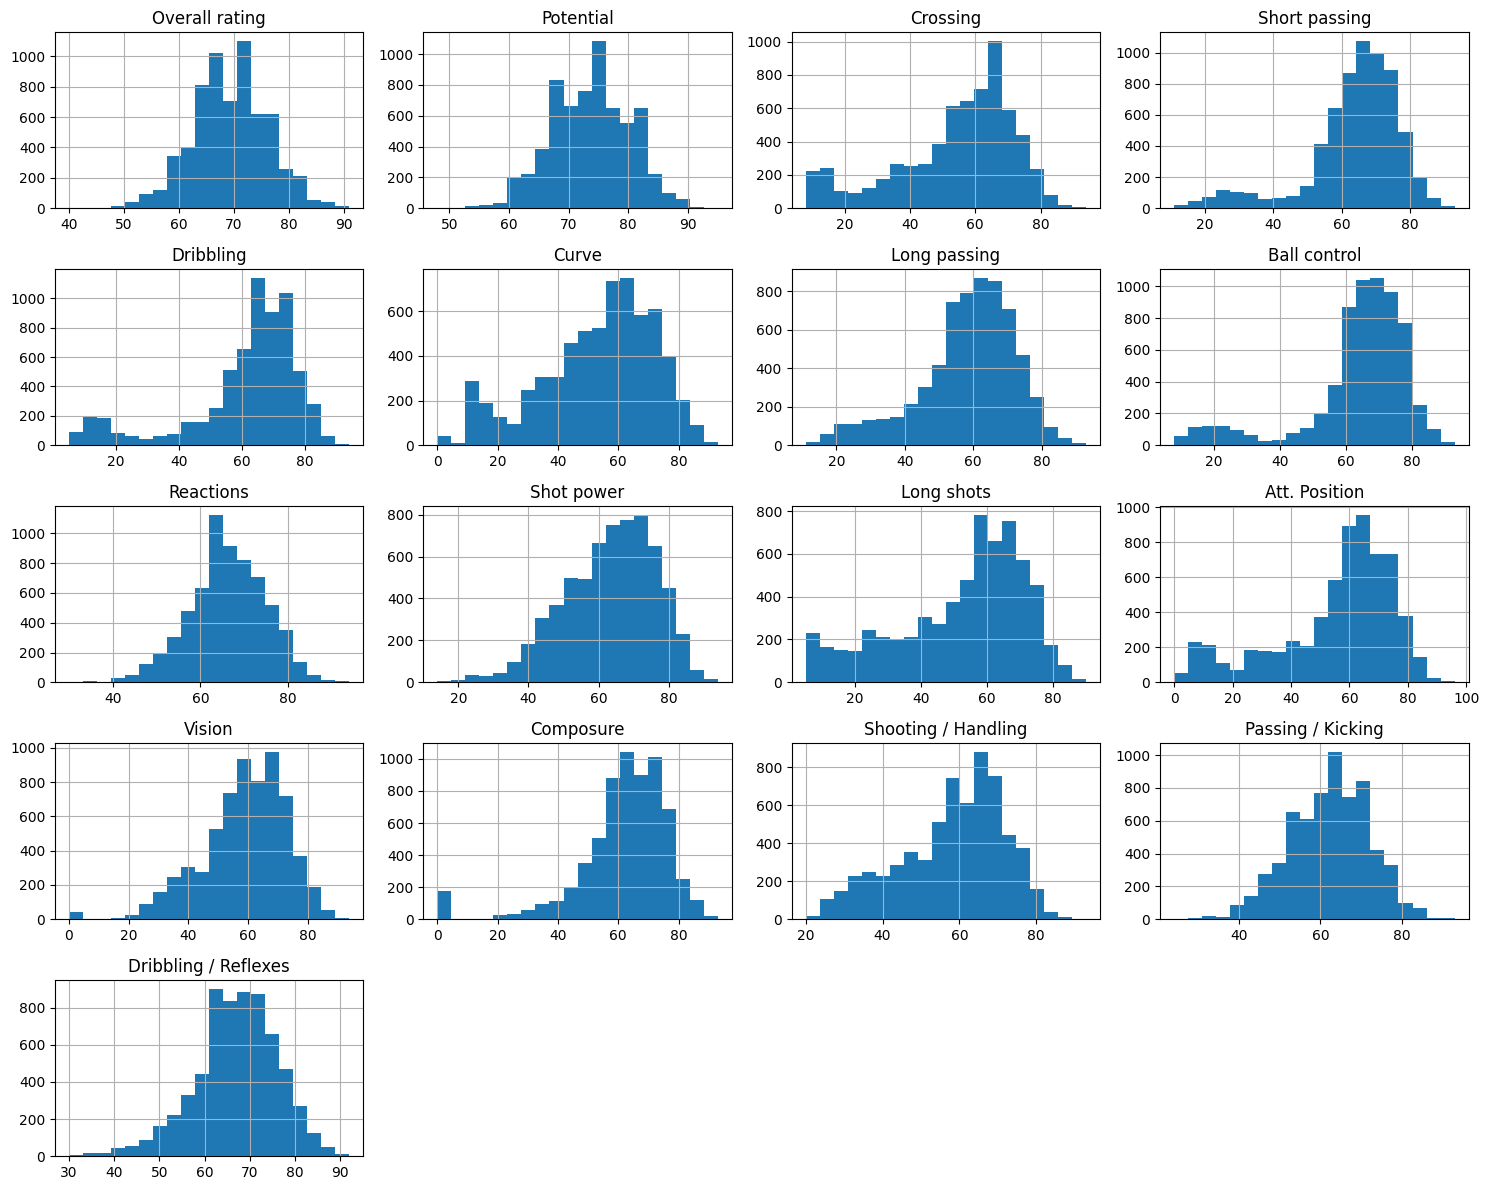

In [23]:
#Histograms for features
df[features].hist(figsize=(15,12), bins=20)
plt.tight_layout()
plt.savefig('../outputs/plots/features_distribution_all_players.png', bbox_inches='tight')
plt.show()

The histograms show that most variables have approximately normal distributions, with concentrations of values between 50 and 80 in variables such as Overall Rating, Potential, and skills such as Reactions, Vision, Passing/Kicking, and Dribbling/Reflexes, indicating that most players have average to good skills.

Likewise, passing and control skills show tails toward low values, reflecting variability among players according to their positions and playing styles. On the other hand, these skills tend to be concentrated in high ranges, suggesting that they are essential skills that remain consistent across most player profiles.

It is important to note that some outliers in low ranges may be influenced by the positions of goalkeepers, who naturally have lower values in field skills such as dribbling, passing, or offensive positioning. For further analysis and to obtain a more accurate representation of the distribution of skills by player type, goalkeeper records will be filtered and the distributions will be regraphed, allowing for a clearer identification of the specific technical profiles of field players according to position and level.

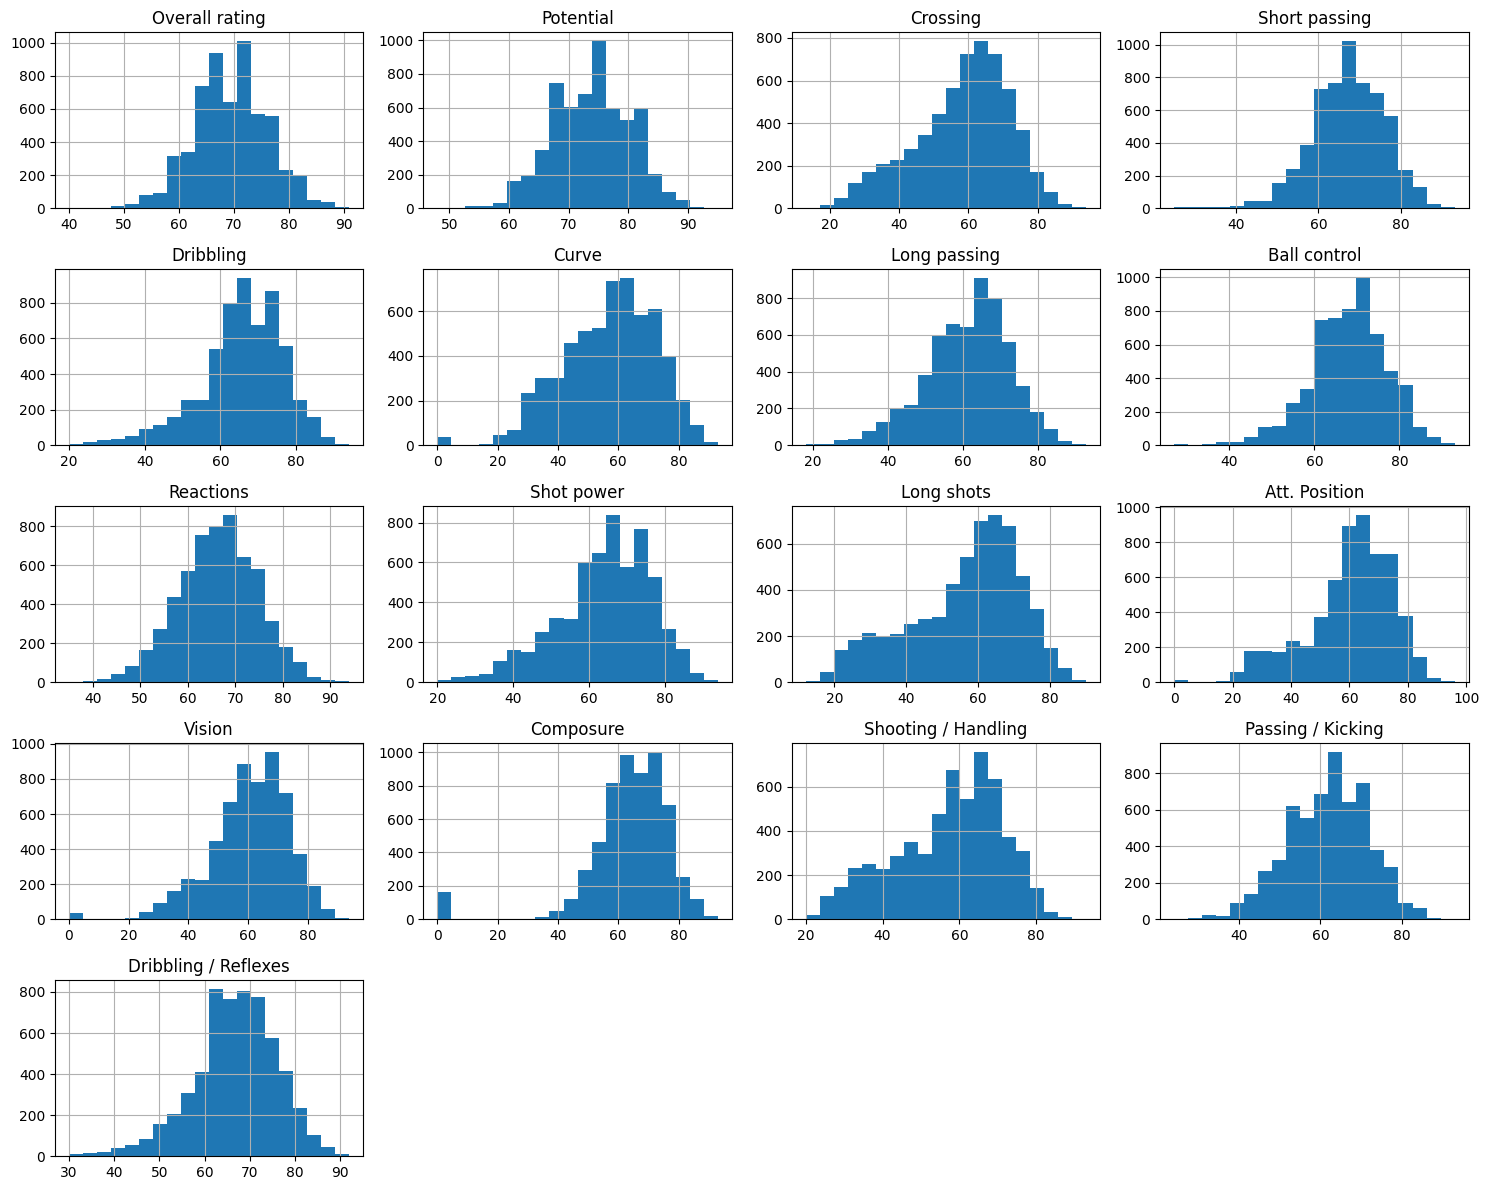

In [24]:
#Show the distribution without specific positions like Goalkeeper
no_gk_df=df[features][~(df['Best position']=='GK')]

#Distribution graphs
no_gk_df.hist(figsize=(15,12), bins=20)
plt.tight_layout()
plt.savefig('../outputs/plots/features_distribution_without_goalkeepers.png')
plt.show()

The exclusion of goalkeepers has allowed for more representative distributions of field players' skills, eliminating outliers in low ranges and showing a greater concentration in medium and high values.

However, during the detailed inspection of the histograms of field players' technical skills, values close to 0 were identified in variables such as Curve, Att. Position, Vision, and Composure.

The presence of these extremely low values may be due to incomplete records, loading errors, or missing values coded as 0, as they do not reasonably reflect the minimum level of a professional field player in these skills.

Given that these outliers can:

    Distort the scales,

    Affect the calculation of distances,

    Generate artificial clusters in algorithms such as K-Means,

It has been decided to review and treat these records before proceeding with clustering.

In [28]:
#Verify low stats in Curve, Att. Position, Vision and Composure
low_stats=['Curve','Att. Position','Vision','Composure']
for stat in low_stats:
    count=len(no_gk_df[no_gk_df[stat]<20])
    print(f'Number of rows with <20 in {stat} value: {count}')

Number of rows with <20 in Curve value: 44
Number of rows with <20 in Att. Position value: 20
Number of rows with <20 in Vision value: 40
Number of rows with <20 in Composure value: 163


In [31]:
for stat in low_stats:
    low_stats_df=no_gk_df[no_gk_df[stat]<20]
    print(f'Stat: {stat}')
    print(low_stats_df[low_stats])

Stat: Curve
      Curve  Att. Position  Vision  Composure
3165     19             24      29         38
3994     17             22      27         50
5272     14             54      39          0
5664     17             20      25         68
5770      0             43       0         59
5800      0             25       0         32
5829      0              0       0         64
5871      0             39       0         43
5873      0             62       0         69
5960     14             40      51         51
5984      0             76       0         66
5997      0             84       0         72
6019      0              0       0         48
6070      0             73       0         58
6076      0             58       0         54
6082      0             69       0         68
6093      0             70       0         61
6102      0             43       0         35
6105      0              0       0         67
6123      0             83       0         81
6129      0           

Values strictly equal to 0 were identified in technical variables for field players, reflecting erroneous records or incorrectly coded missing values. To maintain natural low values but eliminate inconsistent records that would distort the analysis, only rows where these features take the value 0 were removed. This ensures a cleaner and more representative dataset prior to clustering, maintaining the integrity of real patterns in player skills.

In [32]:
#Drop rows in which the features Curve, Att.Position, Vision or Composure are 0
print(f'Number of rows before drop 0 values: {len(no_gk_df)}')
for stat in low_stats:
    no_gk_df=no_gk_df[no_gk_df[stat]>0]
print(f'Number of rows after drop 0 values: {len(no_gk_df)}')

Number of rows before drop 0 values: 5868
Number of rows after drop 0 values: 5668


In [33]:
#Recalculate the stats description to see difference
no_gk_df.describe()

,Overall rating,Potential,Crossing,Short passing,Dribbling,Curve,Long passing,Ball control,Reactions,Shot power,Long shots,Att. Position,Vision,Composure,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes
count,5668.000000,5668.000000,5668.000000,5668.000000,5668.000000,5668.000000,5668.000000,5668.000000,5668.000000,5668.000000,5668.000000,5668.000000,5668.000000,5668.000000,5668.000000,5668.000000,5668.000000
mean,69.586097,73.934016,58.247177,67.185603,65.761291,57.380558,61.281052,67.974947,66.483063,64.087156,56.196895,60.226182,61.059986,65.490649,57.291637,61.993825,66.886909
std,6.672544,6.366897,13.528034,8.634029,11.053490,14.640870,11.079125,8.865169,8.373193,12.351000,15.514892,14.353893,12.354690,9.818887,13.959121,9.772322,9.224362
min,47.000000,48.000000,13.000000,25.000000,20.000000,14.000000,21.000000,27.000000,35.000000,20.000000,12.000000,15.000000,12.000000,32.000000,20.000000,27.000000,30.000000
25%,65.000000,69.000000,50.000000,62.000000,60.000000,47.000000,55.000000,63.000000,61.000000,57.000000,47.000000,53.000000,54.000000,59.000000,48.000000,55.000000,62.000000
50%,70.000000,74.000000,60.000000,67.500000,67.000000,59.000000,62.000000,68.000000,67.000000,66.000000,59.000000,63.000000,62.000000,66.000000,60.000000,62.000000,68.000000
75%,74.000000,79.000000,68.000000,73.000000,73.000000,68.000000,69.000000,74.000000,72.000000,73.000000,68.000000,70.000000,70.000000,73.000000,68.000000,69.000000,73.000000
max,91.000000,95.000000,94.000000,93.000000,94.000000,93.000000,93.000000,92.000000,94.000000,94.000000,90.000000,95.000000,94.000000,93.000000,93.000000,93.000000,92.000000


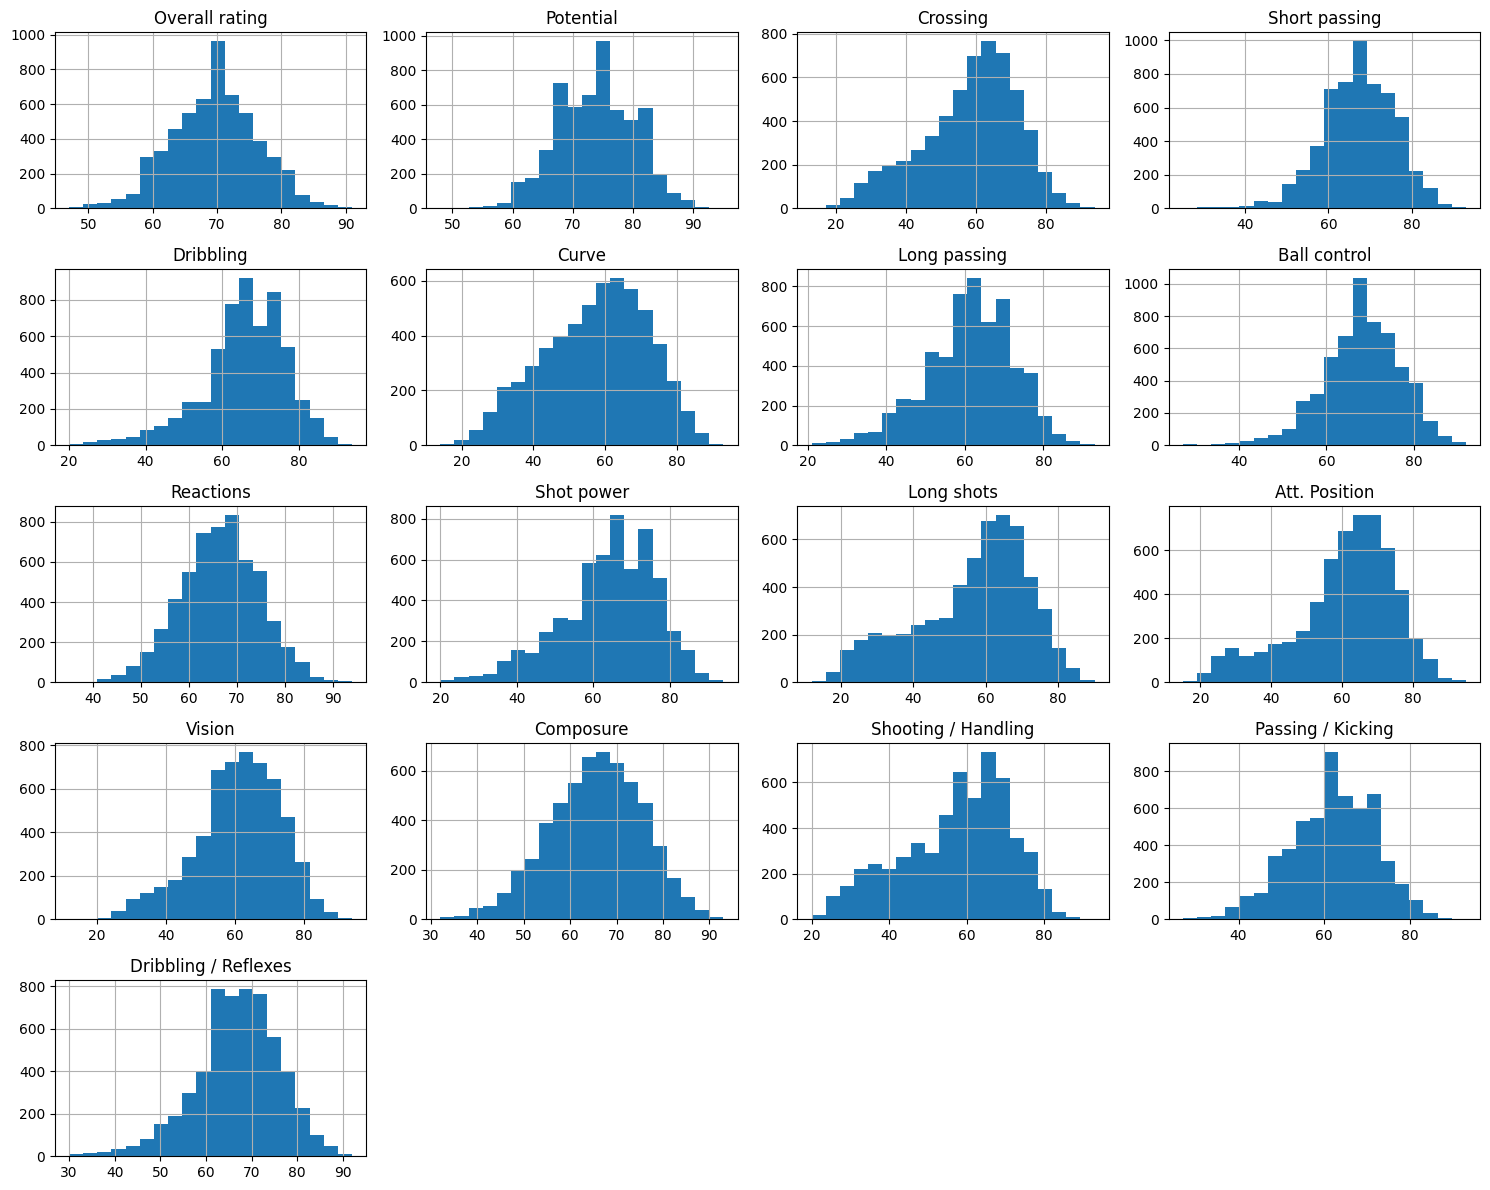

In [34]:
#Distribution graphs after dropping 0 values of Curve, Att. Position, Vision or Composure
no_gk_df.hist(figsize=(15,12), bins=20)
plt.tight_layout()
plt.savefig('../outputs/plots/features_distribution_without_0_values.png')
plt.show()

The elimination of records with values strictly equal to 0 allowed for more normal and representative distributions of the technical skills of field players, eliminating artificial peaks in low ranges. This improves the interpretation of the data, preserves real variability, and prepares the dataset for robust and reliable clustering analysis.

In [35]:
#For the next analysis we don't need variables like Overall rating and Potential
features2=[
    'Crossing','Short passing','Dribbling','Curve','Long passing','Ball control','Reactions',
    'Shot power','Long shots','Att. Position','Vision','Composure','Shooting / Handling',
    'Passing / Kicking','Dribbling / Reflexes'
]

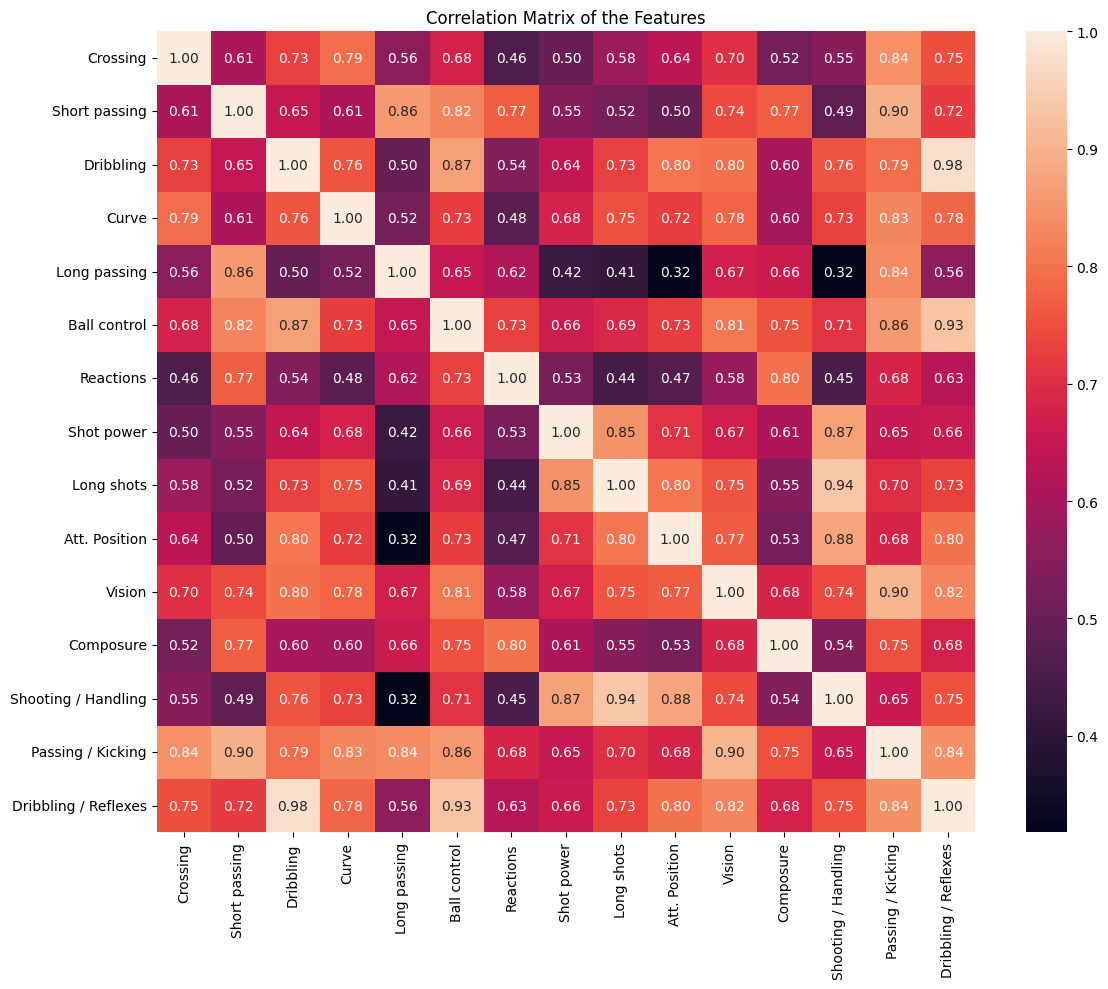

In [61]:
#Correlation analysis
corr_matrix=no_gk_df[features2].corr()
plt.figure(figsize=(12,10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f'
)
plt.title('Correlation Matrix of the Features')
plt.tight_layout()
plt.savefig('../outputs/plots/correlation_matrix.png', bbox_inches='tight')
plt.show()

In [62]:
# Show pairs with correlation >0.90
high_corr = corr_matrix.abs() > 0.90
high_corr_pairs = [
    (col1, col2, corr_matrix.loc[col1, col2])
    for col1 in corr_matrix.columns
    for col2 in corr_matrix.columns
    if col1 != col2 and high_corr.loc[col1, col2]
]

for col1, col2, corr in high_corr_pairs:
    print(f"{col1} & {col2}: {corr:.2f}")


Dribbling & Dribbling / Reflexes: 0.98
Ball control & Dribbling / Reflexes: 0.93
Long shots & Shooting / Handling: 0.94
Vision & Passing / Kicking: 0.90
Shooting / Handling & Long shots: 0.94
Passing / Kicking & Vision: 0.90
Dribbling / Reflexes & Dribbling: 0.98
Dribbling / Reflexes & Ball control: 0.93


During the exploratory analysis, the correlation matrix showed that the variables Dribbling and Ball control with Dribbling/Reflexes have a very high correlation, as do Long shots with Shooting/Handling and Vision with Passing/Kicking, indicating that these correlations provide highly redundant information in the dataset.

Given that the objective of the project is to identify players with characteristics similar to Kevin De Bruyne, the playing style and qualities that distinguish this player on the field were considered:

Kevin De Bruyne's strength lies in his ball control in tight spaces, his first touch, and his ability to maintain possession under pressure, facilitating through passes and quick decisions in the final third of the field.

Consequently, it was decided to keep Dribbling, Ball control, Long shots, and Vision in the feature set, as these most accurately represent De Bruyne's key skills in the context of scouting analysis, while also reducing information redundancy in the clustering process and simplifying the representation space of the players.

In [63]:
#Select relevant features based in matrix of correlations
features3=[
    'Crossing','Short passing','Dribbling','Curve','Long passing','Ball control','Reactions',
    'Shot power','Long shots','Att. Position','Vision','Composure'
]

In [64]:
#Select valid rows from processed dataframe in the original pre processed dataframe
final_df=df.loc[no_gk_df.index]

In [65]:
# Features scaling for clustering
#
# This block standardizes the technical skill variables of players using StandardScaler,
# transforming each variable so that it has a mean of 0 and a standard deviation of 1.
# This ensures that all variables contribute equally to the calculation of distances
# and clustering models, avoiding biases due to differences in scale.

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_scaled=scaler.fit_transform(final_df[features3])

X_scaled_df=pd.DataFrame(X_scaled, columns=features3)

X_scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Crossing,5668.0,1.404036e-16,1.000088,-3.344992,-0.609690,0.129581,0.720998,2.643102
Short passing,5668.0,1.203460e-16,1.000088,-4.886401,-0.600654,0.036417,0.673487,2.990108
Dribbling,5668.0,-5.616146e-16,1.000088,-4.140351,-0.521265,0.112075,0.654938,2.554958
Curve,5668.0,1.604613e-16,1.000088,-2.963238,-0.709075,0.110621,0.725393,2.433092
Long passing,5668.0,-2.607496e-16,1.000088,-3.636082,-0.566977,0.064898,0.696773,2.863200
Ball control,5668.0,5.415569e-16,1.000088,-4.622423,-0.561229,0.002826,0.679692,2.710289
Reactions,5668.0,-6.017299e-16,1.000088,-3.760315,-0.654893,0.061743,0.658939,3.286604
Shot power,5668.0,2.707785e-16,1.000088,-3.569836,-0.573863,0.154887,0.721693,2.422110
Long shots,5668.0,1.203460e-16,1.000088,-2.848927,-0.592831,0.180688,0.760827,2.178944
Att. Position,5668.0,1.002883e-16,1.000088,-3.151074,-0.503475,0.193262,0.680978,2.422819


k=2 -> Inertia=37758.45, Silhouette=0.3570
k=3 -> Inertia=29564.13, Silhouette=0.2703
k=4 -> Inertia=26097.82, Silhouette=0.2133
k=5 -> Inertia=23540.81, Silhouette=0.2191
k=6 -> Inertia=21954.59, Silhouette=0.1774
k=7 -> Inertia=21018.58, Silhouette=0.1570
k=8 -> Inertia=19954.69, Silhouette=0.1580
k=9 -> Inertia=18934.01, Silhouette=0.1759
k=10 -> Inertia=18184.34, Silhouette=0.1555


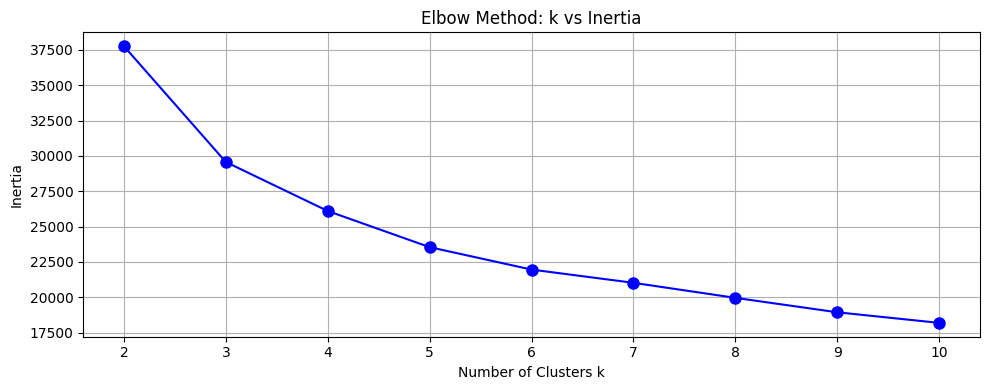

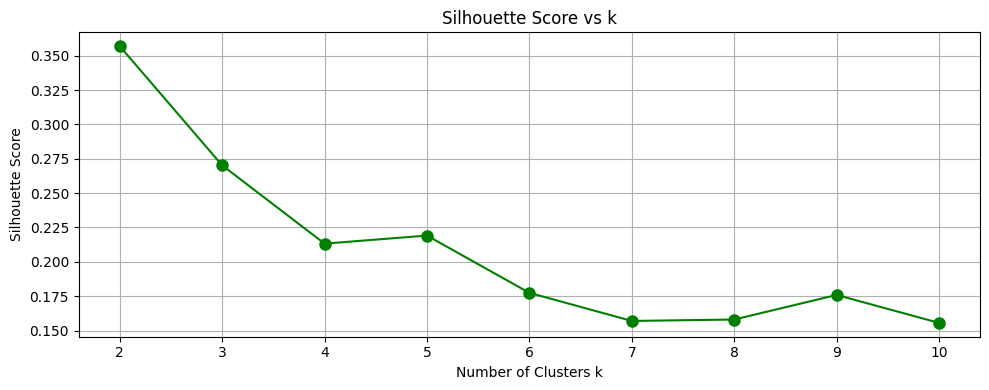

In [105]:
# Test k values for K-Means using the elbow method and silhouette score.
#
# This block evaluates different k values (between 2 and 10) to determine the optimal number of clusters
# by applying K-Means to the scaled data (X_scaled_df).
# The inertia (for the elbow method) and silhouette score are recorded for each k,
# displaying graphs that allow us to visually identify the k that best balances compactness and interpretation 
# of clusters.

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

#Try different values of k for Elbow and Silhouette
inertias = []
silhouette_scores = []
K = range(2, 11)  #Test k between 2 and 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled_df)  # X_scaled_df
    
    inertias.append(kmeans.inertia_)
    silhouette = silhouette_score(X_scaled_df, kmeans.labels_)
    silhouette_scores.append(silhouette)
    print(f"k={k} -> Inertia={kmeans.inertia_:.2f}, Silhouette={silhouette:.4f}")

# Show Elbow method
plt.figure(figsize=(10,4))
plt.plot(K, inertias, 'bo-', markersize=8)
plt.xlabel('Number of Clusters k')
plt.ylabel('Inertia')
plt.title('Elbow Method: k vs Inertia')
plt.grid(True)
plt.tight_layout()
plt.savefig('../outputs/plots/elbow_method_vs_kinertia.png', bbox_inches='tight')
plt.show()

# Show Silhouette Scores
plt.figure(figsize=(10,4))
plt.plot(K, silhouette_scores, 'go-', markersize=8)
plt.xlabel('Number of Clusters k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k')
plt.grid(True)
plt.tight_layout()
plt.savefig('../outputs/plots/silhouette_score_vs_k.png', bbox_inches='tight')
plt.show()

k=3 was selected for K-Means as it offers an adequate balance between reducing inertia and the interpretability of the number of clusters, maintaining an acceptable Silhouette Score and avoiding unnecessary oversegmentation. This allows us to identify three distinct technical profiles among the players analyzed in a practical way.

In [73]:
# Application of K-Means with k=3 for cluster assignment
#
# This block applies K-Means with 3 clusters to the scaled data to segment players
# according to their technical skills, generating cluster labels that are added to the original DataFrame (df)
# for subsequent analysis and visualization of player profiles.

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled_df)

final_df['Cluster']=kmeans.labels_

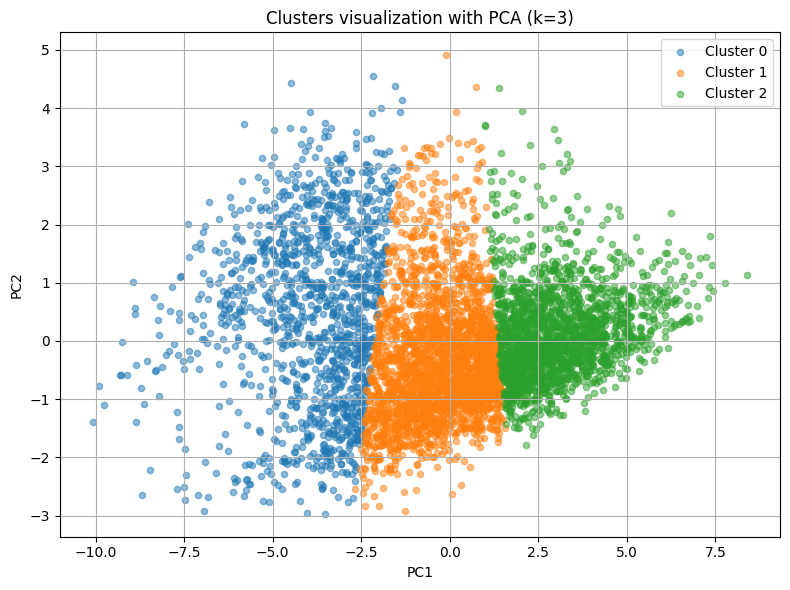

In [106]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2 principal components
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled_df)

# Prepare dataframe
pca_df = pd.DataFrame(components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = final_df['Cluster'].values

# Draw chart
plt.figure(figsize=(8,6))
for cluster in sorted(pca_df['Cluster'].unique()):
    cluster_data = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}', alpha=0.5, s=20)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters visualization with PCA (k=3)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('../outputs/plots/PCA.png', bbox_inches='tight')
plt.show()


In [107]:
# Show number of elements by cluster
final_df['Cluster'].value_counts()

Cluster
1    2489
2    1894
0    1285
Name: count, dtype: int64

In [108]:
# Calculation of feature averages by cluster
#
# This block calculates the average of each selected technical variable (features3)
# for each cluster previously identified with K-Means,
# allowing the average profiles of each cluster of players to be characterized and compared
# in terms of their technical skills.

cluster_means=final_df.groupby('Cluster')[features3].mean()
cluster_means

,Crossing,Short passing,Dribbling,Curve,Long passing,Ball control,Reactions,Shot power,Long shots,Att. Position,Vision,Composure
Cluster,,,,,,,,,,,,
0,42.866148,58.540078,51.367315,39.154086,52.184436,57.085603,59.680156,49.479377,36.469261,41.897276,45.163424,56.024903
1,57.705504,65.395741,65.795500,56.571314,59.022901,66.937324,64.403777,64.050221,56.526316,60.837686,60.190036,63.445159
2,69.394403,75.403379,75.482049,70.809926,70.420275,76.726505,73.831045,74.046463,69.148363,71.857973,72.988384,74.600845


In [109]:
# Calculation of averages of attributes aggregated by cluster
#
# This block calculates the average of the total attack, skill, movement,
# power, mentality, and defense statistics for each cluster, allowing for a more comprehensive and understandable analysis and comparison
# of the aggregated profiles of players segmented by K-Means.

total_stats=[
    'Total attacking','Total skill','Total movement','Total power','Total mentality',
    'Total defending'
]
cluster_means1=final_df.groupby('Cluster')[total_stats].mean()
cluster_means1

,Total attacking,Total skill,Total movement,Total power,Total mentality,Total defending
Cluster,,,,,,
0,233.527626,234.360311,302.484047,286.299611,247.784436,170.564981
1,288.143833,297.865006,344.902772,322.894737,286.394938,148.763761
2,335.491552,356.233897,366.761880,354.958289,331.988384,166.934002


### Conclusion

Based on the cluster analysis of 5,668 FC25 players using the characteristics ‘Crossing’, ‘Short passing’, ‘Dribbling’, ‘Curve’, ‘Long passing’, ‘Ball control’, ‘Reactions’, ‘Shot power’, ‘Long shots’, 'Att. Position', ‘Vision’, and ‘Composure’, three distinct player profiles have been identified, projected onto the first two Principal Components (PC1 and PC2).

Cluster 0 (blue) groups players with generally lower values in offensive and ball control skills, suggesting a profile more oriented towards support or defensive roles, or perhaps representing players in the early stages of development.

Cluster 1 (orange) is positioned as an intermediate group, composed of versatile and balanced players who possess a competent combination of the analyzed skills, suitable for roles that require a balanced contribution in both attack and game construction.

Cluster 2 (green) concentrates players with the highest values in key skills such as ‘Vision’, ‘Dribbling’ and ‘Ball control’, profiling them as playmakers and main attackers, essential for generating offensive opportunities and dictating the pace of the game.

This clustering is a valuable tool for identifying player roles, analyzing squads, scouting, and strategic planning, allowing for a more granular understanding of skill distribution.

### Search player with similar skills to Kevin De Bruyne

In [99]:
# Search the cluster of Kevin De Bruyne

kdb_cluster=df[df['Name']=='K. De Bruyne']['Cluster'].values[0]
print(f'Kevin de Bruyne is in cluster: {kdb_cluster}')

Kevin de Bruyne is in cluster: 2


In [98]:
similar_players=df[
    (df['Cluster']==kdb_cluster) & (df['Age']<30) & 
    (df['Best position'].isin(['CM','CAM','CDM'])) &
    (df['Overall rating']>75) & (df['Potential']>80)].sort_values('Value')
similar_players[['Name','Age', 'Best position', 'Overall rating','Potential','Club','Contract','Value']].head(20)

,Name,Age,Best position,Overall rating,Potential,Club,Contract,Value
4344,25 E. Sánchez,24,CM,78,83,Mexico,Free,0.0
1413,Z. Youssouf,24,CM,76,81,Al Fateh,2025 ~ 2028,10500000.0
972,Altimira,22,CM,76,82,Real Betis Balompié,2023 ~ 2029,11000000.0
492,N. Raskin,23,CM,76,82,Rangers FC,2023 ~ 2028,11000000.0
242,A. Gomes,23,CAM,76,81,Lille OSC,2020 ~ 2025,11500000.0
793,K. Nakamura,23,CAM,76,81,Stade de Reims,2023 ~ 2028,11500000.0
834,P. Nebel,21,CAM,76,82,1. FSV Mainz 05,2020 ~ 2027,12000000.0
356,R. Onyedika,23,CDM,76,83,Club Brugge KV,2022 ~ 2027,14000000.0
1393,24 M. Camara,23,CDM,77,82,AS Monaco,2022 ~ 2027,14500000.0
259,S. Adingra,22,CAM,76,83,Brighton & Hove Albion,2022 ~ 2026,15000000.0
